In [375]:
import math 
import os
import numpy as np
import matplotlib.pyplot as plt
#Defining relevant libraries

In [376]:
def linear_model(x,param): #defining a linear model function
    '''for input slope and intercept return y = mx + b'''
    slope, intercept = param 
    result = slope*x + intercept
    return result

In [377]:
#checking if the function works for given values as suggested in the template
slope0, intercept0 = 1.2,0.5
y_model = linear_model(x,(slope0,intercept0))
print(y_model)


[ 0.5   0.95  1.4   1.85  2.3   2.75  3.2   3.65  4.1   4.55  5.    5.45
  5.9   6.35  6.8   7.25  7.7   8.15  8.6   9.05  9.5   9.95 10.4  10.85
 11.3 ]


In [378]:
#listing x values
controlled_var_x = np.array([0.0,0.375,0.75,1.125,1.5,1.875,2.25,2.625,3.0,3.375,3.75,4.125,4.5,4.875,5.25,5.625,6.0,6.375,6.75,7.125,7.5,7.875,8.25,8.625,9.0])


In [379]:
#listing y values
measured_quantity_y = np.array([-1.8928649489983849,2.444798491815168,1.3296571159781247,2.2128351501861956,2.7476978041227533,5.1042961952096935,3.0045925640951308,4.118938319884113,4.85721592384223,
5.522872034143456,
7.268775349501913,
5.367030669875977,
6.08912262942622,
6.531342932071977,
7.596577854129031,
9.424532353882157,
8.820175254267282,
10.299220857359044,
9.532385606857066,
11.079567549849163,
12.089435264933144,
10.582342154331215,
12.369656954157051,
13.238886051368137,
14.288782952302705])


<function matplotlib.pyplot.show(close=None, block=None)>

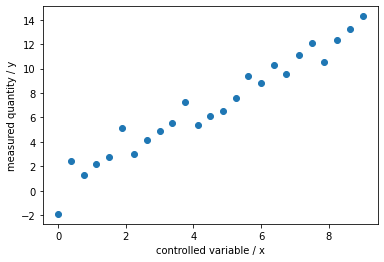

In [390]:
#code to check linearity of initial parameters
plt.scatter(controlled_var_x,measured_quantity_y)
plt.xlabel('controlled variable / x')
plt.ylabel('measured quantity / y')
plt.show

1d) measured quantity y vs controlled variable x, as found in data_points_assign5.txt, data is fairly linear for initial parameters

In [391]:
'''creating a function that calculates the reduced chi squared value, X_N'''
   
def reduced_chi_squared(observed,linear_model,uncertainty = 1): #expected = linear_model, as defined in the 2nd code block
    
    X_N = 0
    for i in range(len(y_model)):
               X_N += ((linear_model[i] - observed[i])/(uncertainty))**2/len(linear_model)
    return X_N


In [392]:
'''lets run a demo of the reduced_chi_squared funtion, lets take in y_model as our observed values,
with measured_quantity_y = observed, linear_model = expected'''
expected=linear_model(controlled_var_x,(1.2,0.5))
reduced_chi_squared(measured_quantity_y,expected,uncertainty = 1)



2.50762102198173

The X_N^2 obtained from initial parameters are not bad but it can be optimized to be around 1

In [393]:
intercept_sequence = np.linspace(0.0, 3.0, 101)  #Setting up the range of intercepts and slopes to calculate chi_squared over
slope_sequence = np.linspace(0.0, 3.0, 101)

In [394]:
rchi2 = np.zeros((len(intercept_sequence),len(slope_sequence))) #initializing the array for X_N^2 with shape (101,101)

In [395]:
#iterating for slopes and intercepts to create a 2D array for X_N"
for i, intercept in enumerate(intercept_sequence):
    for j, slope in enumerate(slope_sequence):
        # Calculate model y values for current slope and intercept
        model_y = linear_model(controlled_var_x,(slope,intercept))
        # Calculate reduced chi squared for current model y values
        rchi2[i, j] = reduced_chi_squared(model_y, measured_quantity_y, uncertainty = 1)


In [396]:
min_index = np.argmin(rchi2) #locating the index of the minimum value of the chi_squared
min_idx_row, min_idx_col = np.unravel_index(min_index, rchi2.shape) #using the unravel method to find the row and column of-
                                                                          #-the minimum value
print(min_idx_row,min_idx_col)

12 49


In [397]:
'''We find that the reduced chi squared value obtained from optimization is less than 2.50762102198173
, the optimzation has been successful'''
print(rchi2[12,49])

0.8647975457609353


In [398]:
'''the optimum slope and intercept values are
0.36 and 1.47 as opposed to 1.2 and 0.5 given in (b)'''
print(intercept_sequence[12])
print(slope_sequence[49])

0.36
1.47


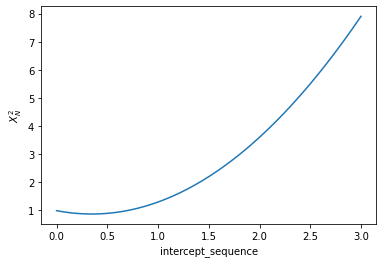

In [399]:
# code to plot X_N^2 against intercept sequence with fixed slope 1.47
rchi_to_plot = np.empty((101, 1))
for i in range(len(intercept_sequence)):
    rchi_to_plot[i] = rchi2[i,49]
plt.xlabel('intercept_sequence')
plt.ylabel('$X_N^2$')
plt.plot(intercept_sequence, rchi_to_plot)
plt.show()


Graph of X_N^2 vs intercept sequence

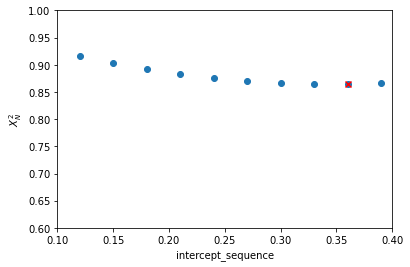

In [400]:
#Changing above code block slightly to change scale and add a point of interest(minima)
rchi_to_plot = np.empty((101, 1))
for i in range(len(intercept_sequence)):
    rchi_to_plot[i] = rchi2[i,49]

plt.xlabel('intercept_sequence')
plt.ylabel('$X_N^2$')
plt.scatter(intercept_sequence, rchi_to_plot)
plt.scatter(intercept_sequence[12], rchi_to_plot[12],color ='red', marker = 'x')

# set the x-axis limits to zoom in on the plot
plt.xlim(0.1, 0.4)
plt.ylim(0.6,1.0)

plt.show()


1g) By changing the scaling of the graph we can observe that the minima lies at 0.36, as predicted by our code

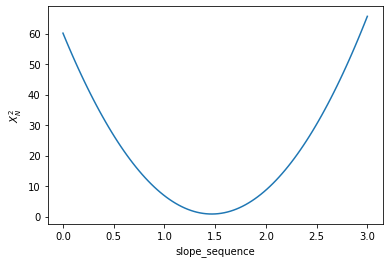

In [324]:
# code to plot X_N^2 against slope sequence with a fixed intercept of 0.36
rchi_to_plot = np.empty((101,1))
for j in range(len(slope_sequence)):
    rchi_to_plot[j] = rchi2[12,j]
plt.xlabel('slope_sequence')
plt.ylabel('$X_N^2$')
plt.plot(intercept_sequence, rchi_to_plot)
plt.show()

Graph of X_N^2 vs slope sequence

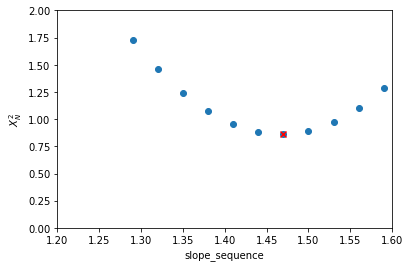

In [401]:
#Changing above code block slightly to change scale and add a point of interest(minima)
rchi_to_plot = np.empty((101, 1))
for j in range(len(slope_sequence)):
    rchi_to_plot[j] = rchi2[12,j]

plt.xlabel('slope_sequence')
plt.ylabel('$X_N^2$')
plt.scatter(intercept_sequence, rchi_to_plot)
plt.scatter(slope_sequence[49], rchi_to_plot[49], color ='red', marker = 'x')

# set the x-axis limits to zoom in on the plot
plt.xlim(1.2, 1.6)
plt.ylim(0.0,2.0)

plt.show()


1g)Changing the scaling of the graph allows us find that the minima is at 1.47, as predicted by our code

In [402]:
xx, yy = np.meshgrid(slope_sequence, intercept_sequence) #setting up 2 1D arrays for meshgrid

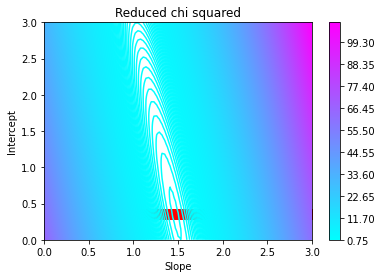

In [403]:
#plotting contour with point of interest(minima)
plt.contour(xx, yy, rchi2, levels=1000, cmap='cool') #Generating a contour map
plt.colorbar()
plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.title('Reduced chi squared')
plt.scatter(xx[49],yy[12], s = 100 ,color = 'red', marker = 'o')
plt.show()

1h. The above contour shows how the reduced chi squared X_N varies with the slope and intercept, the minimum is marked with
the red scatter